# import the libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset

In [2]:

train_data = pd.read_csv('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
train_data.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
train_data.duplicated().sum()

0

In [7]:
test_data = pd.read_csv('test_data.txt ',sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [8]:
test_data.head(
)

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
train_data.shape, test_data.shape

((54214, 3), (54200, 3))

# EDA

In [11]:
train_data.loc[train_data['DESCRIPTION'].str.contains(r'@\S+')].head()

,TITLE,GENRE,DESCRIPTION
243,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1881,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1987,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6580,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8297,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


#we need to remove "Mail svaradi@sprynet.com for translation"


#also from title we discovered that it contains title and description in different languages

In [12]:
train_data.loc[train_data['DESCRIPTION'].str.contains(r'http\S+')].head()

,TITLE,GENRE,DESCRIPTION
16975,The Happiness Matrix (2012),documentary,"Volume 1 of ""The Happiness Matrix"", a 2-hour ..."
20749,Blocking the Path to 9/11 (2008),documentary,There's more to the story of the Clintons and...
26258,"""Offbeat America"" (2005)",reality-tv,High Noon Entertainment hosts visit the Asian...
30652,Hollywood Love (1998),comedy,A feminist sex movie??? http:hollywoodlovemov...
33420,Trust 22 (2007),documentary,In this amazing film full of magic the direct...


need to remove http link from describtion

#### We discovered above that the data contains different languages, hence Finding the language of all the descriptions

In [13]:
pip install langdetect 

Note: you may need to restart the kernel to use updated packages.


In [14]:
from langdetect import detect
lang_count=0
def detect_language(text):
    
    #for tracking the progress
    global lang_count
    lang_count=lang_count+1
    print(lang_count)
    
    #returning the code of language if found else unknown
    try:
        return detect(text)
    except:
        return 'Unknown'

In [15]:
# train_data['Language'] = train_data['DESCRIPTION'].apply(detect_language)
# test_data['Language'] = test_data['DESCRIPTION'].apply(detect_language)

In [16]:
train_data["GENRE"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

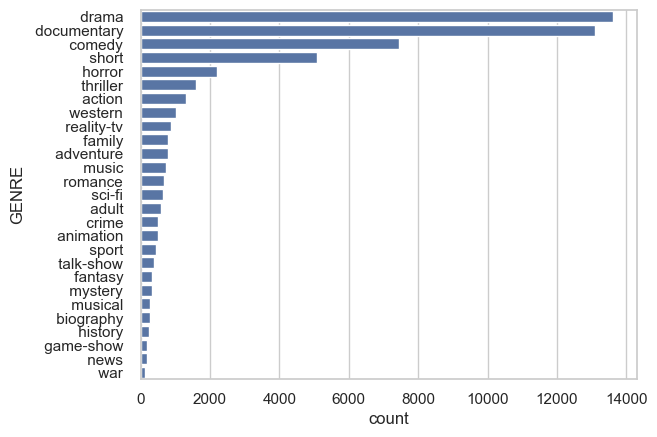

In [17]:
# plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

observation: Drama has most number of counts and war has less count in Genre 

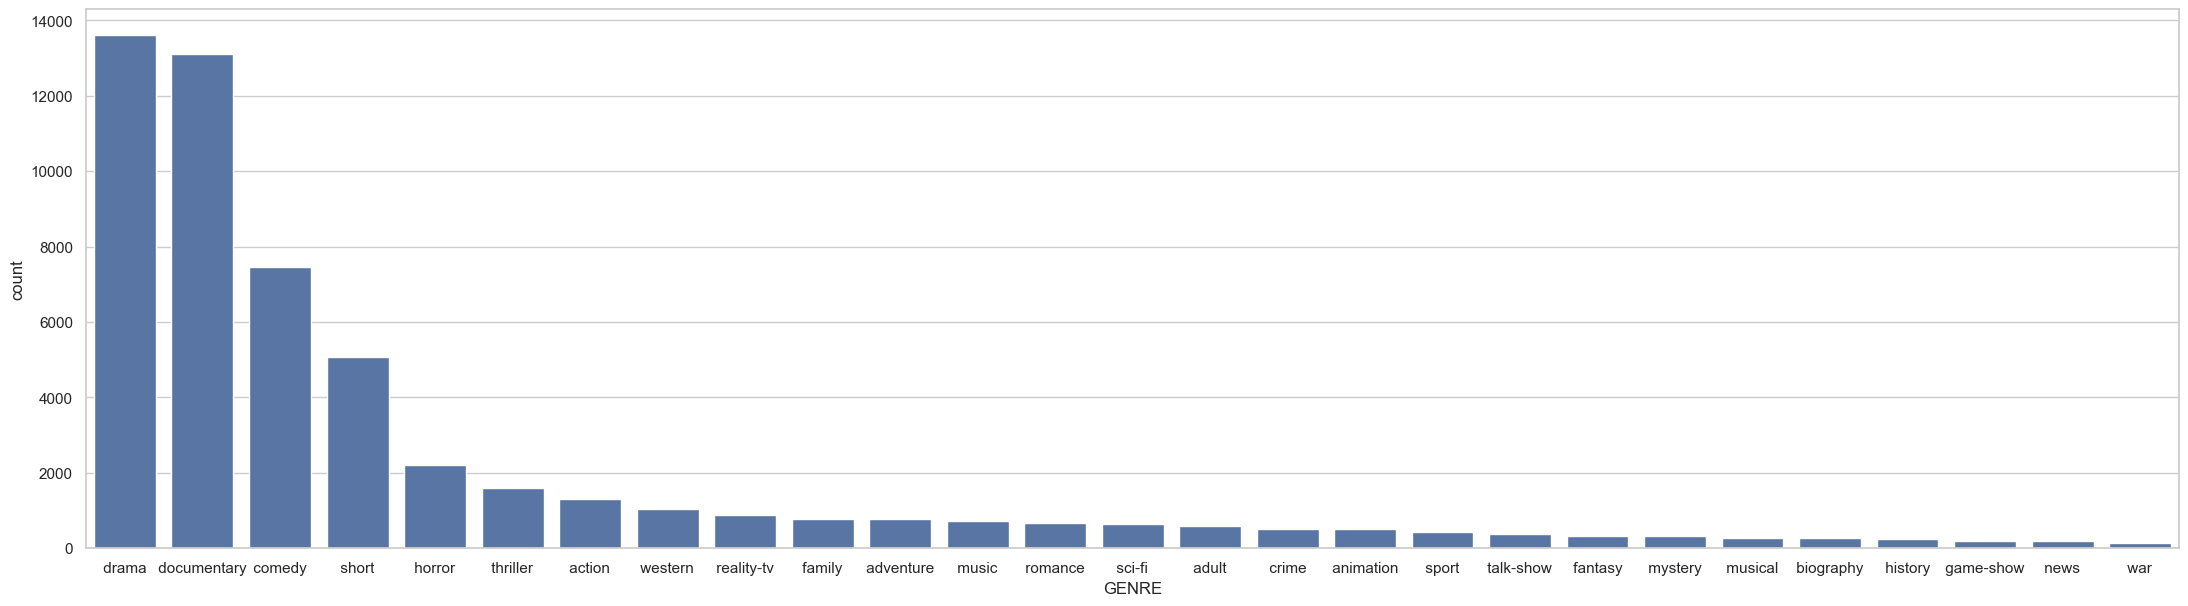

In [18]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index,)
plt.show()

observation: Same we will see in this plot therefore Drama has high number of count of Genre


**we can clearly see that the class is highly imbalance in training and testing data.**



**Hence in order to avoid the imbalance we can use the random sampler**

In [19]:
import re  # used for pattern matching and text manipulation.
import string 
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

# Vectorizing using tfidf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer(stop_words='english',max_features=35000)


In [22]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

In [35]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

***Modelling***

- Logistic Regression
- Naive bayes
- RandomForest
- Support Vector Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


mnb = MultinomialNB(alpha=0.5)
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500,
                         random_state=42, tol=0.1, n_jobs=4)
svc = LinearSVC()
rdmfr = RandomForestClassifier(n_estimators=100, random_state=42)
dcst = DecisionTreeClassifier()

In [38]:
lgc.fit(X_train, Y_train)
lgc.score(X_test, Y_test)

0.5550124504288481

In [39]:
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.4555012450428848

In [40]:
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.49110024900857696

In [44]:
rdmfr.fit(X_train, Y_train)
rdmfr.score(X_test, Y_test)

0.4913769252052015

In [42]:
svc.fit(X_train,Y_train)
svc.score(X_test,Y_test)

0.5879369178271696

In [45]:
ypred_test_lgc = lgc.predict(X_test)
ypred_train_lgc = lgc.predict(X_train)

ypred_test_bnb = bnb.predict(X_test)
ypred_train_bnb = bnb.predict(X_train)

ypred_test_mnb = mnb.predict(X_test)
ypred_train_mnb = mnb.predict(X_train)

ypred_test_rdmfr = rdmfr.predict(X_test)
ypred_train_rdmfr = rdmfr.predict(X_train)

ypred_test_svc = svc.predict(X_test)
ypred_train_svc = svc.predict(X_train)

In [47]:
from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression : ")
print("Train accuracy: ", accuracy_score(Y_train, ypred_train_lgc))
print("Test accuracy: ", accuracy_score(Y_test, ypred_test_lgc))

print("\n\nBernoulliNB : ")
print("Train accuracy: ", accuracy_score(Y_train, ypred_train_bnb))
print("Test accuracy: ", accuracy_score(Y_test, ypred_test_bnb))

print("\n\nMultinomialNB : ")
print("Train accuracy: ", accuracy_score(Y_train, ypred_train_mnb))
print("Test accuracy: ", accuracy_score(Y_test, ypred_test_mnb))

print("\n\nRandom Forest : ")
print("Train accuracy: ", accuracy_score(Y_train, ypred_train_rdmfr))
print("Test accuracy: ", accuracy_score(Y_test, ypred_test_rdmfr))

print("\n\nSupport Vector : ")
print("Train accuracy: ", accuracy_score(Y_train, ypred_train_svc))
print("Test accuracy: ", accuracy_score(Y_test, ypred_test_svc))

Logistic Regression : 
Train accuracy:  0.6345253740978996
Test accuracy:  0.5550124504288481


BernoulliNB : 
Train accuracy:  0.5520970233566208
Test accuracy:  0.49110024900857696


MultinomialNB : 
Train accuracy:  0.5012796569136059
Test accuracy:  0.4555012450428848


Random Forest : 
Train accuracy:  0.9996541467801066
Test accuracy:  0.4913769252052015


Support Vector : 
Train accuracy:  0.980309423347398
Test accuracy:  0.5879369178271696


***Test accuracy can be improved if we apply all the preprocessing we applied to train data***

<Axes: title={'center': 'Logistic Regression Test: '}>

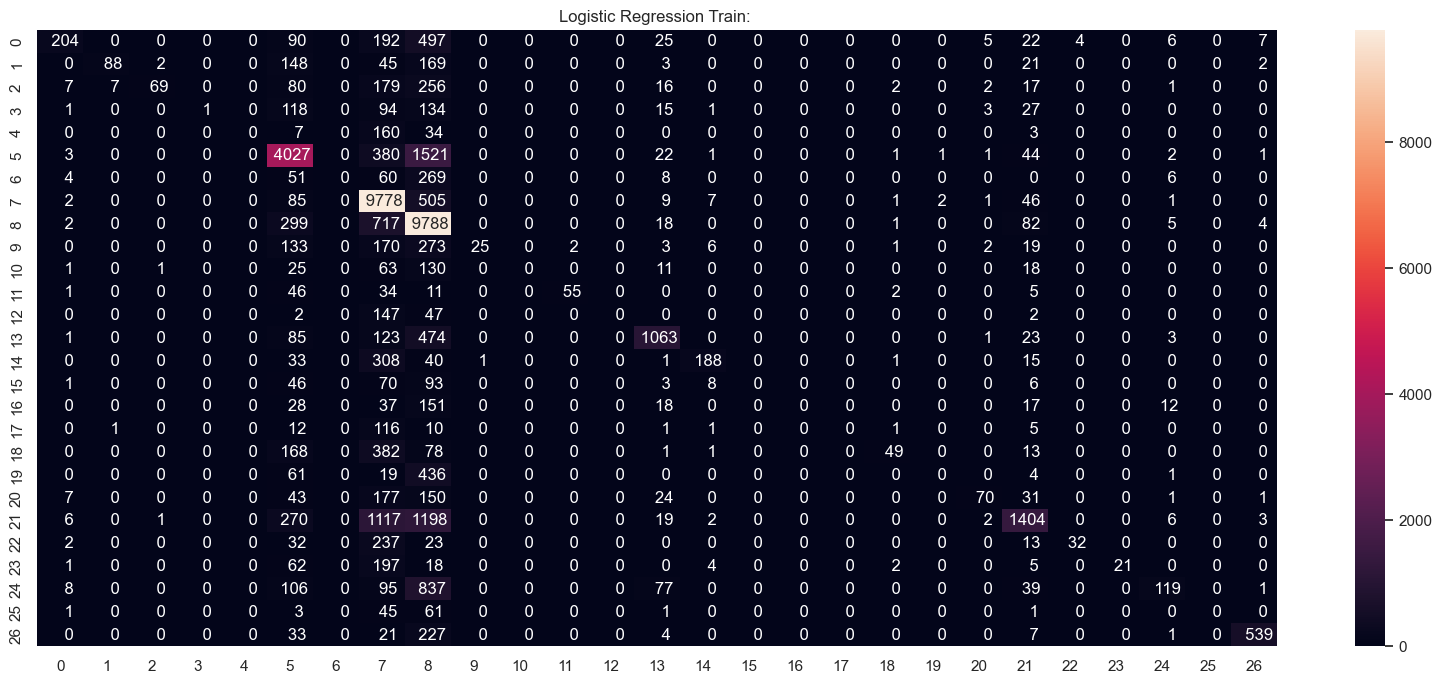

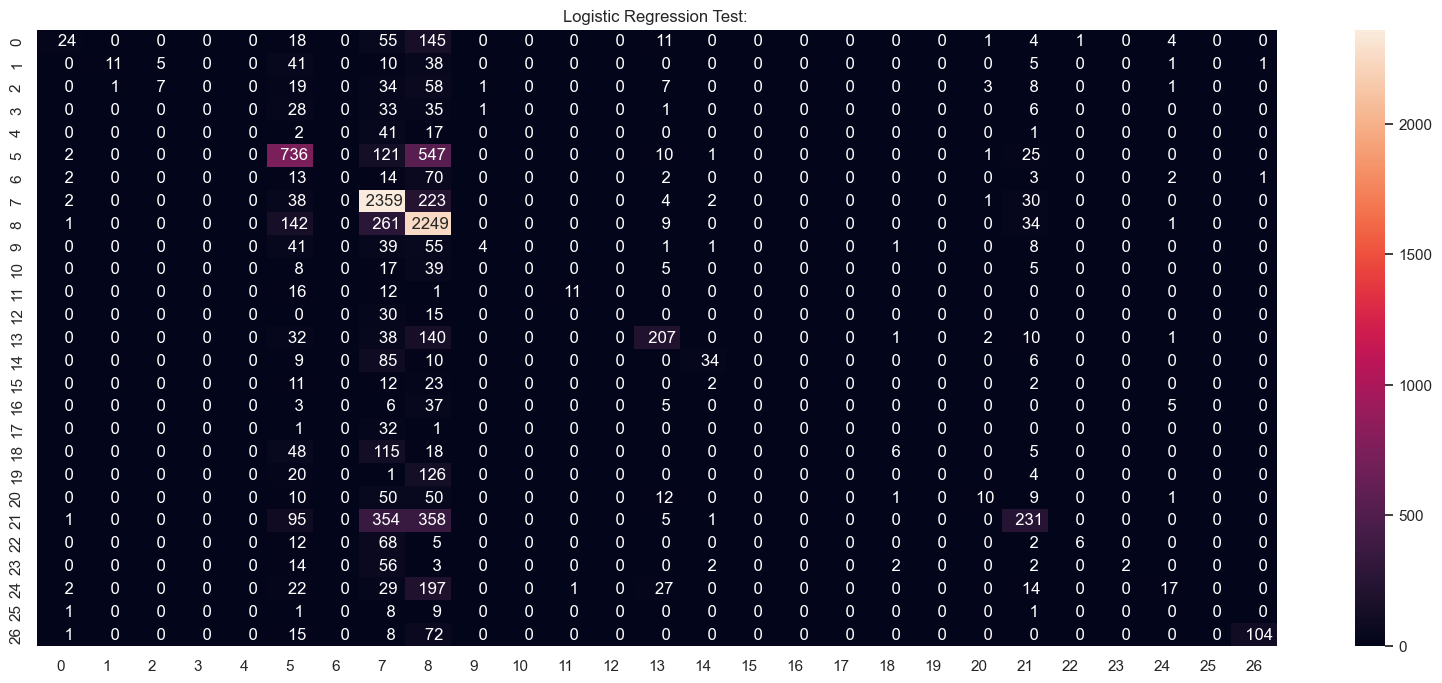

In [49]:
from sklearn.metrics import confusion_matrix,precision_score


cm1 = confusion_matrix(Y_train,ypred_train_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Train: ")
sns.heatmap(cm1,annot=True,fmt="5g")

cm2 = confusion_matrix(Y_test,ypred_test_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Test: ")
sns.heatmap(cm2,annot=True,fmt="5g")

In [50]:
scores = [{"Model":"Logistic Regression","Train Accuracy":0.9468998860022146,"Test Accuracy":0.5159040590405904},
         {"Model":"BernoulliNB","Train Accuracy":0.9134487458883257,"Test Accuracy":0.5271955719557195},
         {"Model":"MultinomialNB","Train Accuracy":0.9319468590753393,"Test Accuracy":0.5165313653136532},
         {"Model":"Random Forest","Train Accuracy":1.0,"Test Accuracy":0.48837638376383763},
         {"Model":"Support Vector","Train Accuracy":0.9908692943292223,"Test Accuracy":0.4830811808118081}]

scoresdf = pd.DataFrame(scores)

***Exporting Models, Vectorizer, Encoder uisng Pickle***

In [51]:
import pickle as pkl

In [53]:
pkl.dump(scoresdf, open("scores.pkl", "wb"))
# pkl.dump(encoder, open("encoder.pkl", "wb"))
pkl.dump(tfidf, open("vectorizer.pkl", "wb"))
pkl.dump(lgc, open("logistic.pkl", "wb"))
pkl.dump(mnb, open("mnb.pkl", "wb"))
pkl.dump(bnb, open("bnb.pkl", "wb"))
pkl.dump(rdmfr, open("rdmfr.pkl", "wb"))
pkl.dump(svc, open("svc.pkl", "wb"))

***Testing the performance of XGboost***

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
xgb.score(X_test, Y_test)